## Plots for data with a single variable

In [1]:
# Importing pandas for data & seaborn, pyplot for visualizations
import pandas as pd
import seaborn as sns
import plotly.express as plx
import matplotlib.pyplot as plt

###Importing the Dataset
####Socio-Economic Country Profiles

This dataset contains about 95 statistical indicators of the 66 countries. It covers a broad spectrum of areas including

General Information; Broader Economic Indicators ; Social Indicators ; Environmental & Infrastructure Indicators Military Spending ; Healthcare Indicators ; Trade Related Indicators e.t.c.


In [2]:
df = pd.read_csv('/content/soci_econ_country_profiles.csv')
df.head(10)

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961
5,5,Bosnia and Herzegovina,SouthernEurope,51209,3507,68.8,96.4,16251,3.1,4265.0,...,0.810133,79.581,74.622,77.128000,0.906093,1709258.0,1642269.0,20.259337,8.226837,47.876
6,6,Brazil,SouthAmerica,8515767,209288,25.0,96.6,1772591,-3.8,8528.3,...,3.446373,79.156,71.804,75.456000,1.419527,105601740.0,102232091.0,13.615781,24.962261,86.309
7,7,Bulgaria,EasternEurope,111002,7085,65.3,94.6,48953,3.0,6846.8,...,2.064355,78.400,71.400,74.814634,1.421706,3636886.0,3439061.0,20.108152,16.866936,74.669
8,8,Canada,NorthernAmerica,9984670,36624,4.0,98.5,1552808,0.9,43205.6,...,1.596884,84.100,79.900,81.948780,1.293395,18418770.0,18124551.0,12.715432,54.912023,81.350
9,9,Chile,SouthAmerica,756102,18055,24.3,98.2,240796,2.3,13416.2,...,2.182718,82.333,77.333,79.909000,1.935613,9373185.0,9097254.0,17.462826,36.551478,87.490


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 96 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Unnamed: 0                                                   66 non-null     int64  
 1   country                                                      66 non-null     object 
 2   Region                                                       66 non-null     object 
 3   Surface area (km2)                                           66 non-null     int64  
 4   Population in thousands (2017)                               66 non-null     int64  
 5   Population density (per km2, 2017)                           66 non-null     float64
 6   Sex ratio (m per 100 f, 2017)                                66 non-null     float64
 7   GDP: Gross domestic product (million current US$)            66 non-null     int64

In [4]:
df['Education: Primary gross enrol. ratio (f/m per 100 pop.)']

,Education: Primary gross enrol. ratio (f/m per 100 pop.)
0,109.8/110.2
1,102.1/102.3
2,102.2/103.7
3,101.3/101.4
4,104.2/104.2
...,...
61,116.0/116.7
62,108.1/108.4
63,100.0/100.3
64,98.6/101.3


###Data Cleaning and pre=processing

In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
country,0
Region,0
Surface area (km2),0
Population in thousands (2017),0
...,...
"Population, female",0
"Population, male",0
Tax revenue (% of GDP),8
"Taxes on income, profits and capital gains (% of revenue)",9


In [5]:
#Drop row with null values
df.dropna(inplace = True)

In [5]:
# Select only numeric columns and keep 'Region' and 'country'
df = pd.concat([df[['Region', 'country']], df.select_dtypes(include=[float, int])], axis=1)

# Check the updated DataFrame types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 80 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region                                                       66 non-null     object 
 1   country                                                      66 non-null     object 
 2   Unnamed: 0                                                   66 non-null     int64  
 3   Surface area (km2)                                           66 non-null     int64  
 4   Population in thousands (2017)                               66 non-null     int64  
 5   Population density (per km2, 2017)                           66 non-null     float64
 6   Sex ratio (m per 100 f, 2017)                                66 non-null     float64
 7   GDP: Gross domestic product (million current US$)            66 non-null     int64

###Data Visualisations

In [6]:
!pip install pillow
!pip install wordcloud

####Word Cloud

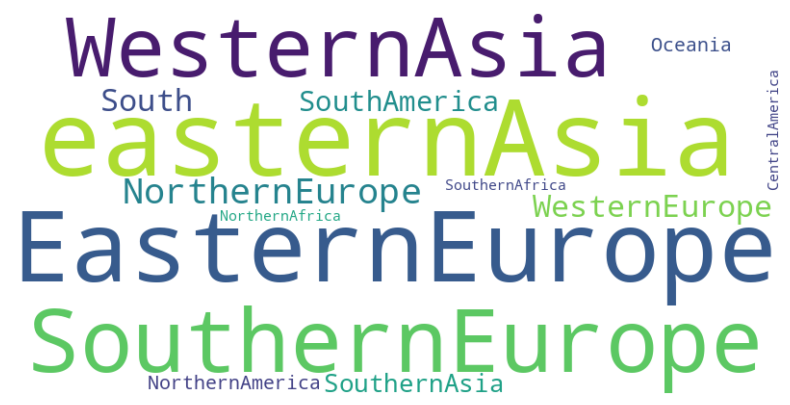

In [7]:
from PIL import Image
from wordcloud import WordCloud
Regions = " ".join(df['Region'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Regions)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis to show
plt.show()

Question answered : Which regions in the world are featured most in this dataset?

The word cloud has the most frequent values in large size and the less frequent ones with tiny font

####Box and Whisker Plot

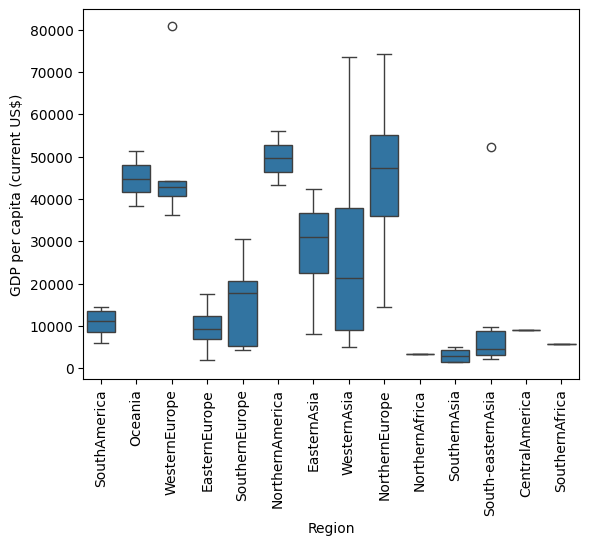

In [8]:
sns.boxplot(x='Region', y='GDP per capita (current US$)', data=df)
plt.xticks(rotation=90)
plt.show()


Question answered : How does the GDP epr capita vary across different regions?

A box and whisker plot shows us the spread of values for a numeric data. The box showcases the middle 50% of the data. The whiskers showcase the

####Area Chart

In [15]:
import pandas as pd
import plotly.express as px

df['Population (2017)'] = df['Population in thousands (2017)'] * 1000

# Aggregate total population by region
region_population = df.groupby('Region')['Population (2017)'].sum().reset_index()

# Merge with the original DataFrame to get region-wise data
df = df.merge(region_population, on='Region', suffixes=('', '_total'))

# Calculate weighted averages for employment data
df['Weighted_Agriculture'] = df['Employment: Agriculture (% of employed)'] * df['Population (2017)'] / df['Population (2017)_total']
df['Weighted_Industry'] = df['Employment: Industry (% of employed)'] * df['Population (2017)'] / df['Population (2017)_total']
df['Weighted_Services'] = df['Employment: Services (% of employed)'] * df['Population (2017)'] / df['Population (2017)_total']

# Aggregate the weighted data by region
region_weighted_employment = df.groupby('Region')[['Weighted_Agriculture', 'Weighted_Industry', 'Weighted_Services']].sum().reset_index()

# Step 2: Plot the aggregated data
fig = px.area(region_weighted_employment, x='Region',
              y=['Weighted_Agriculture', 'Weighted_Industry', 'Weighted_Services'],
              labels={'value': 'Percentage of Employed', 'variable': 'Sector'},
              title='Weighted Sectoral Employment Distribution by Region')

# Show the chart
fig.show()


Question answered : Is there a regional variation in the percentage employyes by the three sectors ?

####3D Chart

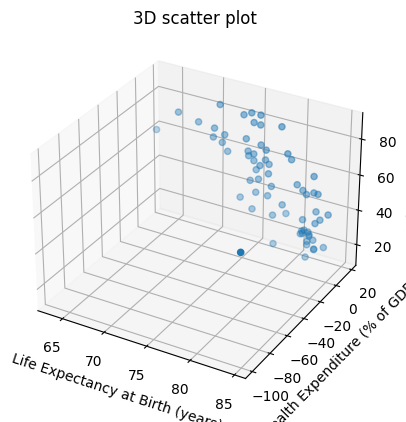

In [10]:

ax = plt.axes(projection ="3d")

ax.scatter(df['Life expectancy at birth, total (years)'],
                df['Health: Total expenditure (% of GDP)'],
                df['Pollution index'])

plt.title("3D scatter plot")

ax.set_xlabel('Life Expectancy at Birth (years)')
ax.set_ylabel('Health Expenditure (% of GDP)')
ax.set_zlabel('Pollution Index')
# show plot
plt.show()

####Violin Plot

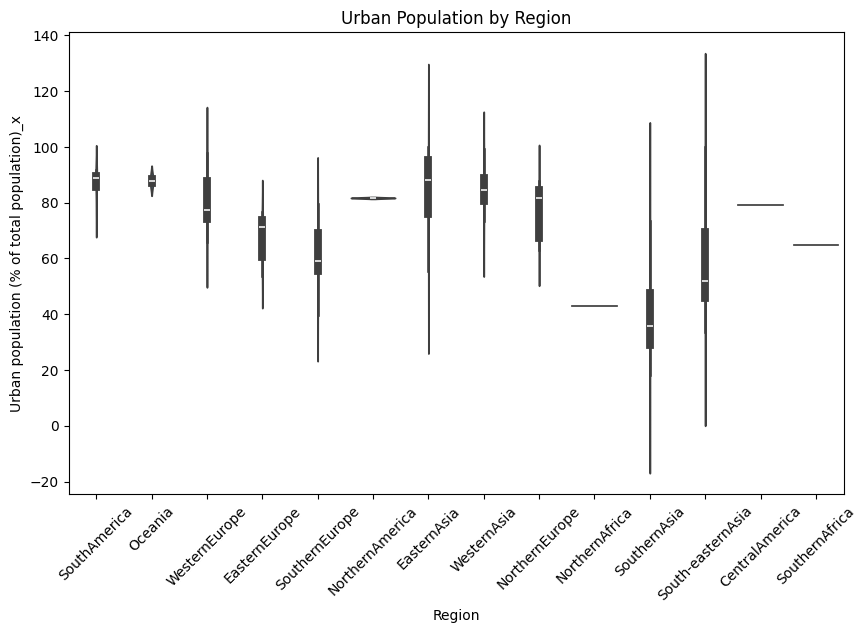

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Region', y='Urban population (% of total population)_x', data=df)
plt.xticks(rotation=45)
plt.title('Urban Population by Region')
plt.show()

####Donut Chart

In [12]:
import plotly.express as px

country_data = df[df['country'] == 'Japan']

# Aggregate the total exports and imports
total_exports = country_data['International trade: Exports (million US$)'].sum()
total_imports = country_data['International trade: Imports (million US$)'].sum()

# Prepare data for the pie chart
values = [total_exports, total_imports]
labels = ['Exports', 'Imports']

# Create the pie chart
fig = px.pie(values=values, names=labels, title="Export vs Import Share for Japan", hole=0.4)

# Show the chart
fig.show()

Question Answered : How does the trade baalnce for (any particular country) look?

####TreeMap

In [13]:
import plotly.express as px

# Create a treemap of population by country
fig = px.treemap(df,
                 path=['country'],
                 values='Population in thousands (2017)',
                 title="Population Distribution by Country")

# Show the chart
fig.show()


How do the populations of various countries compare with each other?

####Line Chart

In [14]:
df['GDP growth rate (annual %, const. 2005 prices)'] = pd.to_numeric(df['GDP growth rate (annual %, const. 2005 prices)'], errors='coerce')

df_grouped = df.groupby('Region', as_index=False)['GDP growth rate (annual %, const. 2005 prices)'].mean()

fig = px.line(df_grouped,
              x='Region',
              y='GDP growth rate (annual %, const. 2005 prices)',
              title="Average GDP Growth Rate by Region",
              labels={'GDP growth rate (annual %, const. 2005 prices)': 'Average GDP Growth Rate (%)',
                      'Region': 'Region'})

fig.show()

Questions answered :

Which regions show the highest GDP growth rate?

Which regions show the least GDP growth rate?

####Funnel Chart

In [32]:
import plotly.graph_objects as go
country_data = df[df['country'] == 'Belgium']

population_in_thousands = country_data['Population in thousands (2017)'].iloc[0]
total_pop = int(population_in_thousands) * 1000

urban_population = country_data['Urban population (% of total population)_y'].iloc[0]
urban_population_number = int(total_pop * (urban_population / 100))

rural_population_number = total_pop - urban_population_number

# Create a funnel chart using Plotly
fig = go.Figure()

fig.add_trace(go.Funnel(
    y=["Total Population", "Urban Population", "Rural Population"],
    x=[total_pop, urban_population_number, rural_population_number],
    textinfo="value+percent initial",
))

fig.update_layout(
    title="Funnel Chart of Population Distribution in Belgium",
    xaxis_title="Population",
    yaxis_title="Stage"
)

fig.show()


How urbanised is a particular country?

####Jitter Plot

<ipython-input-17-dde03821a72f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




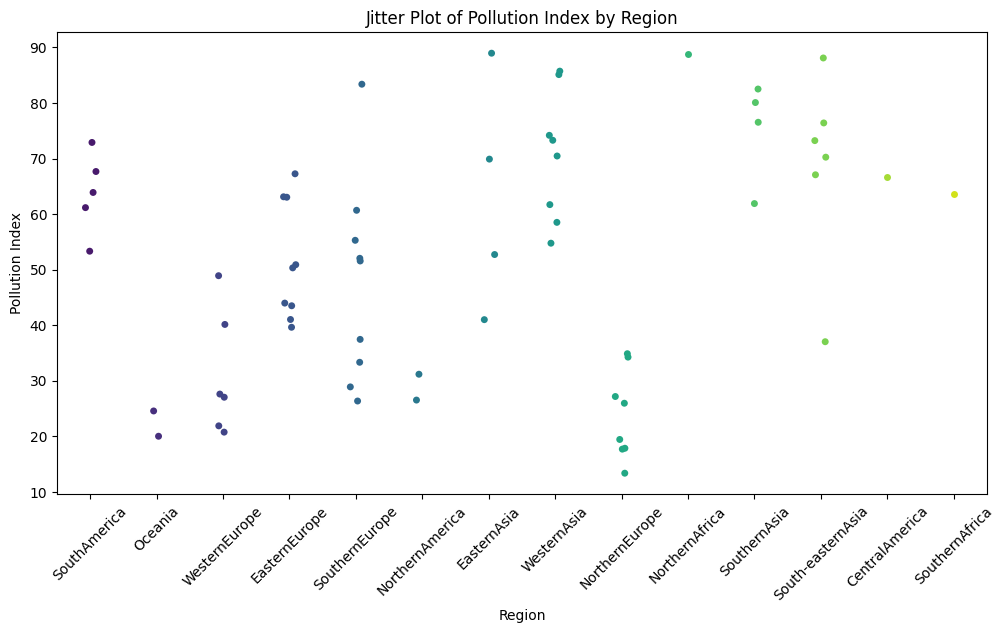

In [17]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Region',
              y='Pollution index',
              data=df,
              jitter=True,
              palette='viridis')

plt.xlabel('Region')
plt.ylabel('Pollution Index')
plt.title('Jitter Plot of Pollution Index by Region')
plt.xticks(rotation=45)

plt.show()

Question Answered : Variations in the pollution indices of various nations in a region